# 서울시 구별 CCTV 현황 분석하기
- 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- jupyter Notebook 사용환경을 익히고 python 기본 문법을 확인
- pandas와 matplotlib의 기본적 사용법을 확인
- 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [30]:
import pandas as pd
import numpy as np

In [31]:
CCTV_Seoul = pd.read_csv('01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [32]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [33]:
CCTV_Seoul.columns[0]

'기관명'

In [34]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'},inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [35]:
# 강남구에 집중적으로 2013년 이전에는 설치되어 있었음

In [36]:
pop_seoul = pd.read_excel('01. population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [37]:
# header = 2 는 3행부터 데이터를 가져옴
pop_seoul = pd.read_excel('01. population_in_Seoul.xls', header=2, usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [38]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자'
                         }, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# CCTV 데이터 파악하기

In [39]:
# 서울시내 구별 CCTV는 몇대가 각각 설치되었는지?
# 서울시의 CCTV 설치 편향성이 존재하는지?

In [40]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [41]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [42]:
# CCTV 설치 최근 증가율

In [43]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head(20)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


# 서울시 인구 데이터 파악하기

In [44]:
# 서울시에 거주하는 인구의 형태는?
# 서울시 내국인은 지역구별 분포는 어떻게 되어 있는지?
# 서울시 지역구별 외국인 분포는 어떻게 되어 있는지?

In [45]:
popS = pop_seoul.dropna()

In [46]:
popS.drop([0],inplace=True)

/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
popS['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [48]:
# 서울의 외국인의 비율은 어느정도인지?
# 서울의 고령자 비율은 어느정도인지?
# 어느 구에 외국인이 많이 사는지 또는 적게 사는지...
# 어느 구에 고령자가 많이 사는지 또는 적게 사는지...

In [49]:
popS['외국인비율'] = popS['외국인']/popS['인구수']*100
popS['고령자비율'] = popS['고령자']/popS['인구수']*100
popS

<ipython-input-49-7a5e89539e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popS['외국인비율'] = popS['외국인']/popS['인구수']*100
<ipython-input-49-7a5e89539e1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popS['고령자비율'] = popS['고령자']/popS['인구수']*100


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [50]:
# 인구수, 외국인, 고령자 어디가 제일 많은지

In [51]:
popS.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [52]:
popS.sort_values(by='외국인',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [53]:
popS.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [54]:
popS.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# CCTV 데이터와 인구 데이터 합치고 분석하기

In [55]:
# merge를 활용하여 두 데이터의 공통된 칼럼인 '구별'로 merge
data_result = pd.merge(CCTV_Seoul, popS, on='구별')

In [56]:
data_result['2014년 -> 2016년 증가율'] = data_result['2016년'] - data_result['2014년']
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,278
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,84
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,353
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,96
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,150
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,303
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,459
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,227


In [57]:
# 두개 이상의 데이터를 결합해서 새로운 데이터 프레임을 구성했을때 분석에 필요하지 않은 요소를 구분
# 필요없는 컬럼이라면 삭제하여 새로운 데이터 프레임을 만듬

In [58]:
# 의미 없는 컬럼 지우기
# 기억하기) 행 방향 삭제 : drop, 열 방향 삭제 del
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,278
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,84
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,353
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,96
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,150
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,303
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,459
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,227


In [59]:
data_result.set_index('구별',inplace=True)
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,278
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,84
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,353
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,96
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,150
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,303
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,459


##### numpy의 correcoef(상관계수)를 사용하여 상관관계를 분석
##### 고령자비율,외국인비율,인구수 중 무슨 데이터와 CCTV를 비교 분석할지?
- 상관관계 분석 기준
- 1) 값이 0.1이면 거의 무시
- 2) 값이 0.3이하이면 약한 상관관계
- 3) 0.7이하면 뚜렷한 상관관계

In [60]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [61]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [62]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- 상관관계 분석 결과 CCTV 개수와 고령자비율은 상관관계 없음
- 외국인비율도 상관관계 없다
- 인구수는 상관관계 약하게 있다.
    - CCTV와 인구수의 관계를 추가적 분석이 필요함

In [63]:
data_result.sort_values(by='소계',ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,325
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,241
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,244
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,180


# CCTV와 인구현황 그래프로 분석하기

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [65]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,278
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,84
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,353


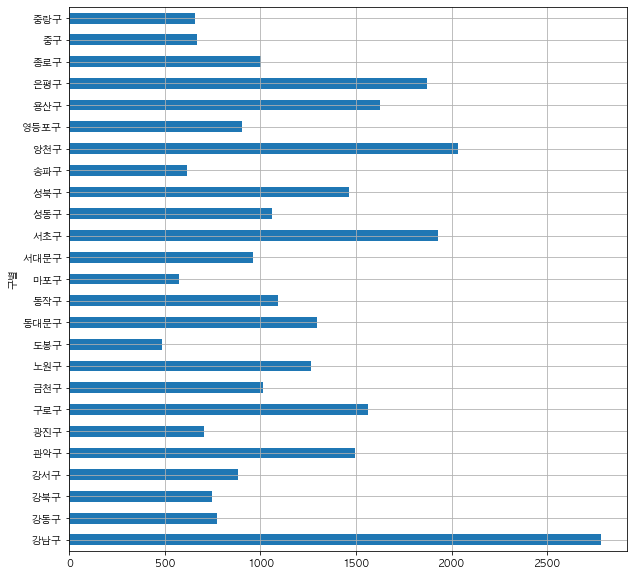

In [66]:
plt.figure()
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

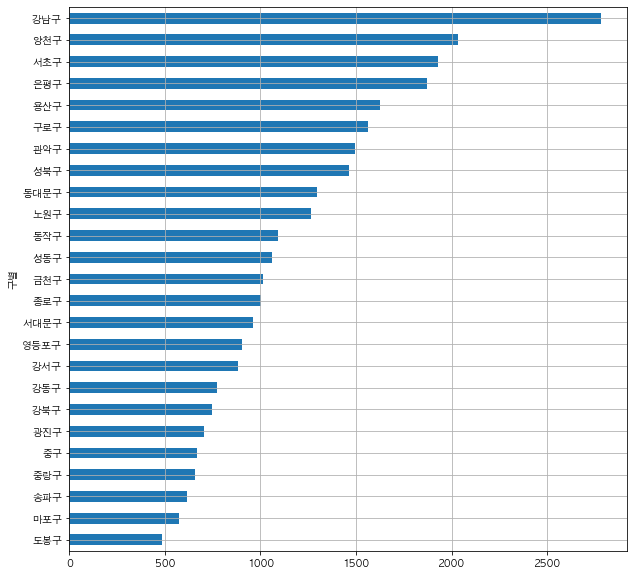

In [67]:
# 크기가 큰 구부터 나올 수 있도록 정렬 - sort_values 사용
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

- CCTV 개수는 서울시의 타 지역구보다 강남구가 월등이 많이 설치되어 있다
- 상대적으로 양천구, 서초구, 은평구도 많은 CCTV 설치가 되어 있음
- 인구대비 CCTV 비율을 추가 분석이 필요

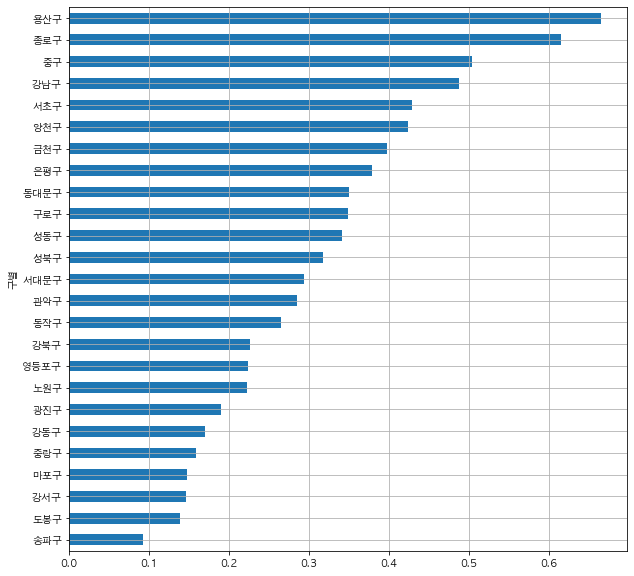

In [68]:
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [69]:
data_result['CCTV비율'].sort_values(ascending=False)

구별
용산구     0.665020
종로구     0.615404
중구      0.503603
강남구     0.487292
서초구     0.428594
양천구     0.423769
금천구     0.397911
은평구     0.378852
동대문구    0.350207
구로구     0.348536
성동구     0.341211
성북구     0.317391
서대문구    0.294043
관악구     0.284673
동작구     0.264472
강북구     0.226535
영등포구    0.224326
노원구     0.222170
광진구     0.189970
강동구     0.170552
중랑구     0.159227
마포구     0.147312
강서구     0.146413
도봉구     0.139110
송파구     0.092587
Name: CCTV비율, dtype: float64

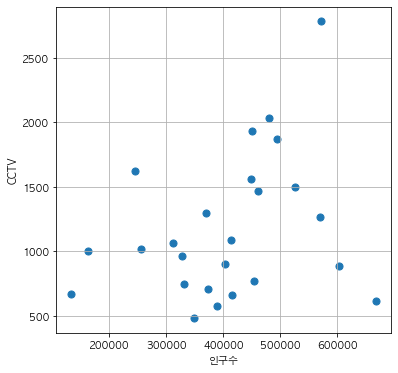

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### numpy의 polyfit을 활용하여 시각화 분석

In [71]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [72]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

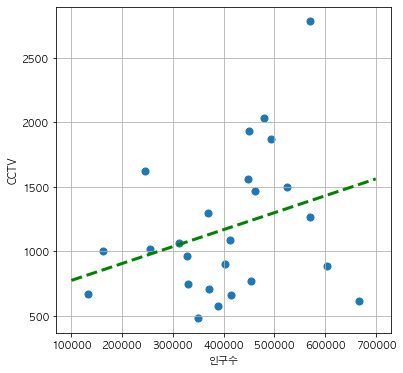

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)

# 선의 종류(line style)과 선의 두께(line width)는 참조하여 변경 적용
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [75]:
data_result.sort_values(by='인구수',ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율,CCTV비율
구별,,,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,442,0.092587
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177,0.146413
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502,0.487292
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,459,0.222170
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,353,0.284673


# 조금 더 설득력 있는 자료 만들기

In [76]:
# 하나의 직선이 이 전체 데이터의 대표 값 역할을 한다면, 즉 구의 수가 300000 일때는 CCTV는 1100정도
# 중심의 경향에서 멀어져 있는 구를 다른 색으로 표현하기 위해서 오차를 계산하여 오차가 큰 순으로 데이터를 정렬

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) # x선의 범위, x점의 개수를 선언해줌


data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,442,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,325,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,241,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,180,0.665020,659.231690


In [77]:
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,2014년 -> 2016년 증가율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,502,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,442,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,325,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,241,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,180,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,227,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,261,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,244,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,-177,0.146413,551.503155


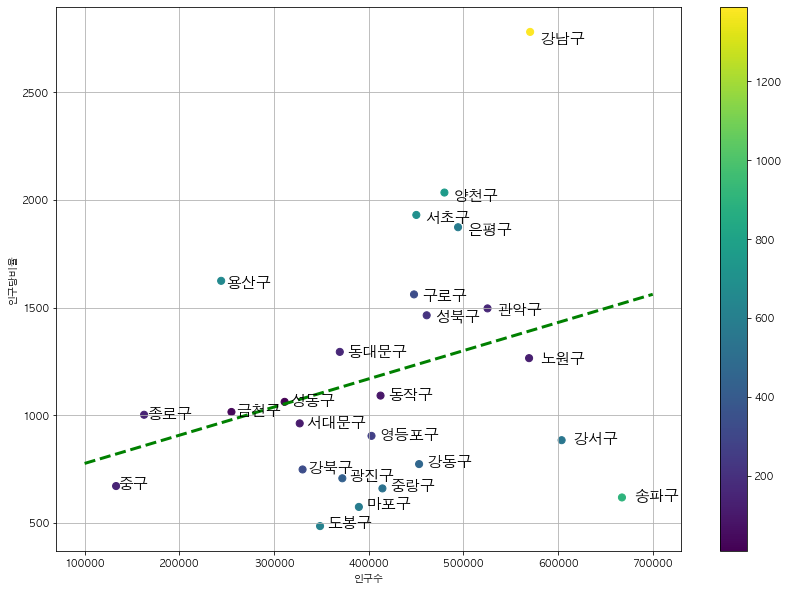

In [78]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 정렬한 데이터 프레임의 plt.text를 활용

for n in range(len(df_sort)):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다